In [6]:
# Setup path
import os
os.chdir("C:/movie_recommendation_system")

# Imports
from src.data.data_preprocessing import MovieDataPreprocessor

# Instantiate and run preprocessing
processor = MovieDataPreprocessor(dataset_dir='dataset')

movies_metadata, ratings, credits, keywords = processor.load_data()
movies_metadata = processor.preprocess_movies(movies_metadata)
merged_metadata = processor.merge_metadata(movies_metadata, credits, keywords)
filtered_ratings = processor.filter_sparse_data(ratings)
final_data = processor.merge_with_ratings(filtered_ratings, merged_metadata)
final_data = processor.handle_missing_values(final_data)

C:\movie_recommendation_system\src\data\data_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata['id'] = movies_metadata['id'].astype(int)
C:\movie_recommendation_system\src\data\data_preprocessing.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata['genres'] = movies_metadata['genres'].apply(


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

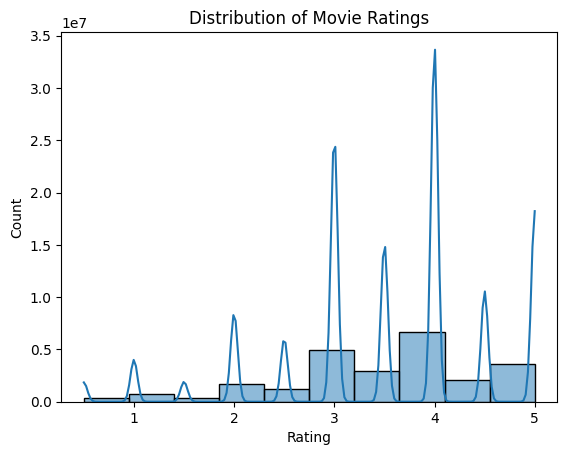

In [8]:
sns.histplot(final_data['rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


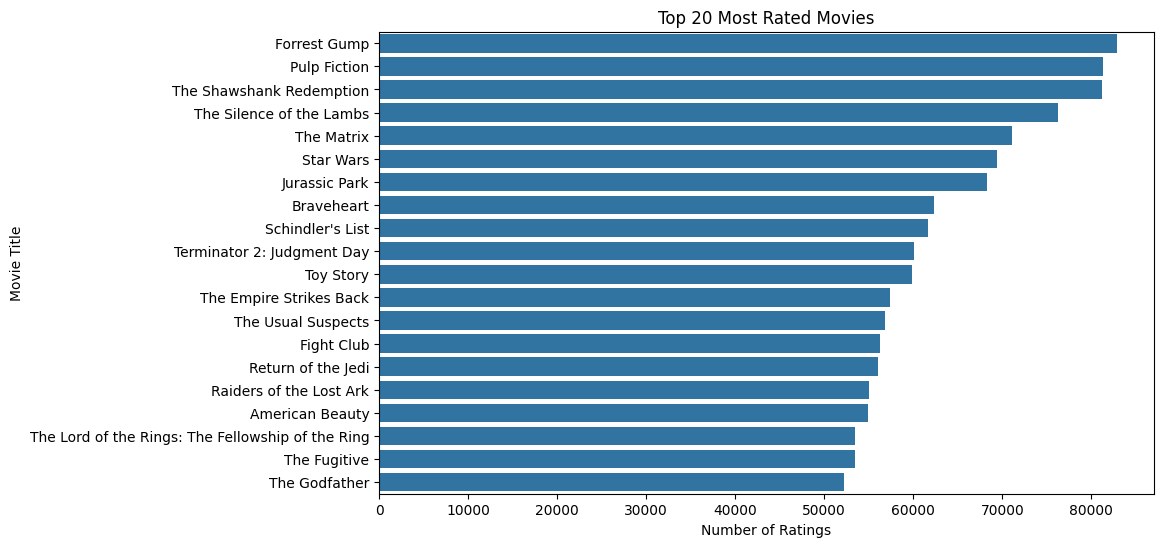

In [9]:
top_movies = final_data['title'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_movies.index, x=top_movies.values)
plt.title("Top 20 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()


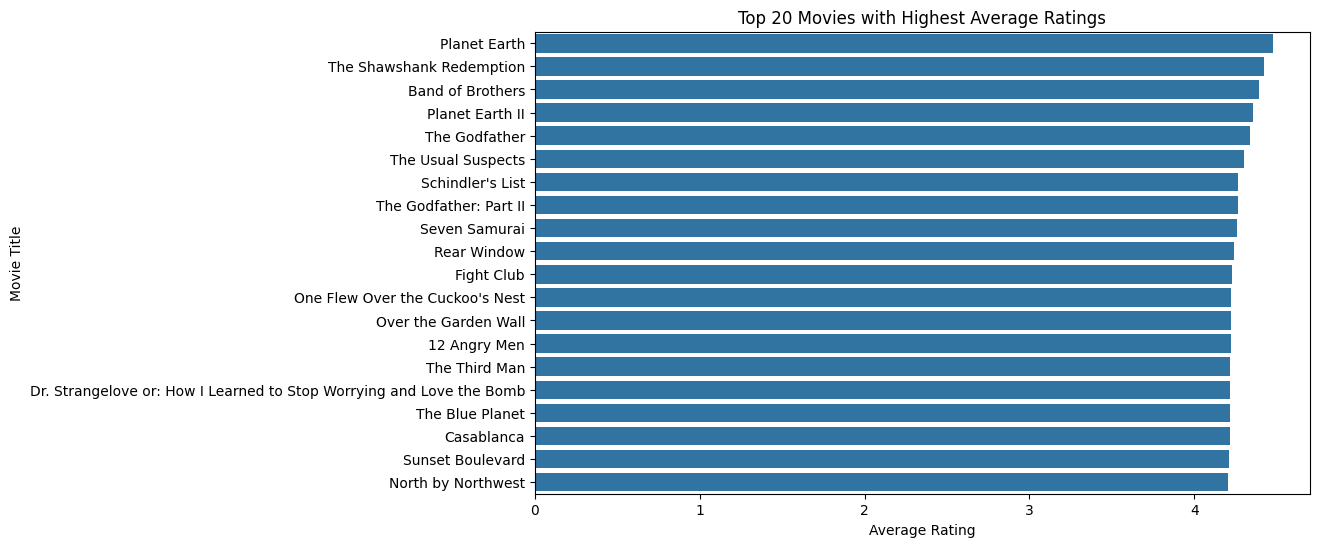

In [10]:
avg_rating = final_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=avg_rating.index, x=avg_rating.values)
plt.title("Top 20 Movies with Highest Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()


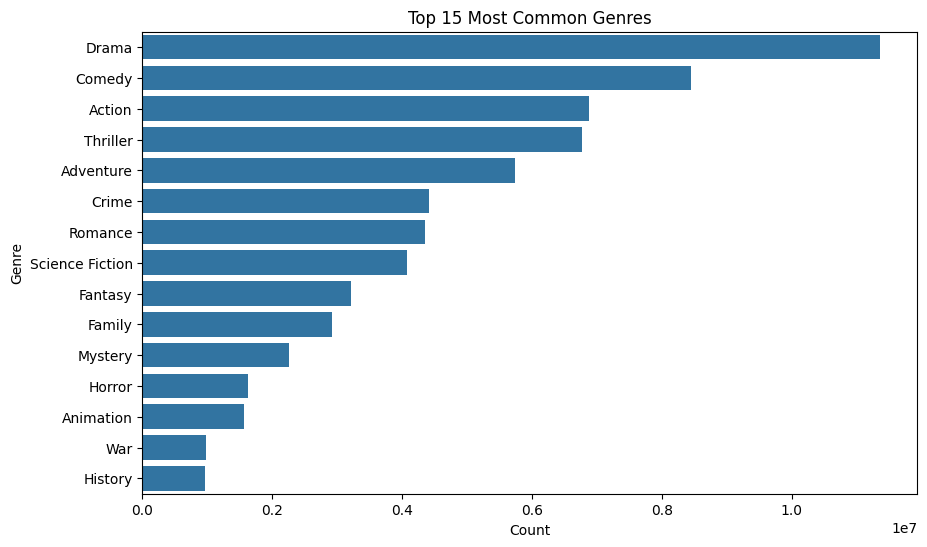

In [11]:
from collections import Counter

flat_genres = [genre for sublist in final_data['genres'] for genre in sublist]
genre_counts = Counter(flat_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df.head(15), x='Count', y='Genre')
plt.title("Top 15 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


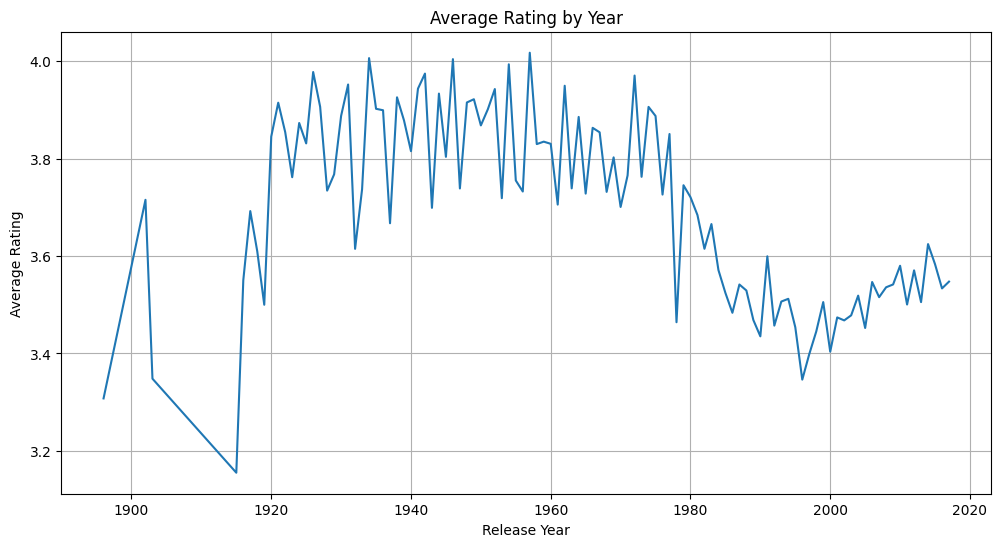

In [12]:
final_data['year'] = final_data['release_date'].dt.year

yearly_ratings = final_data.groupby('year')['rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values)
plt.title("Average Rating by Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


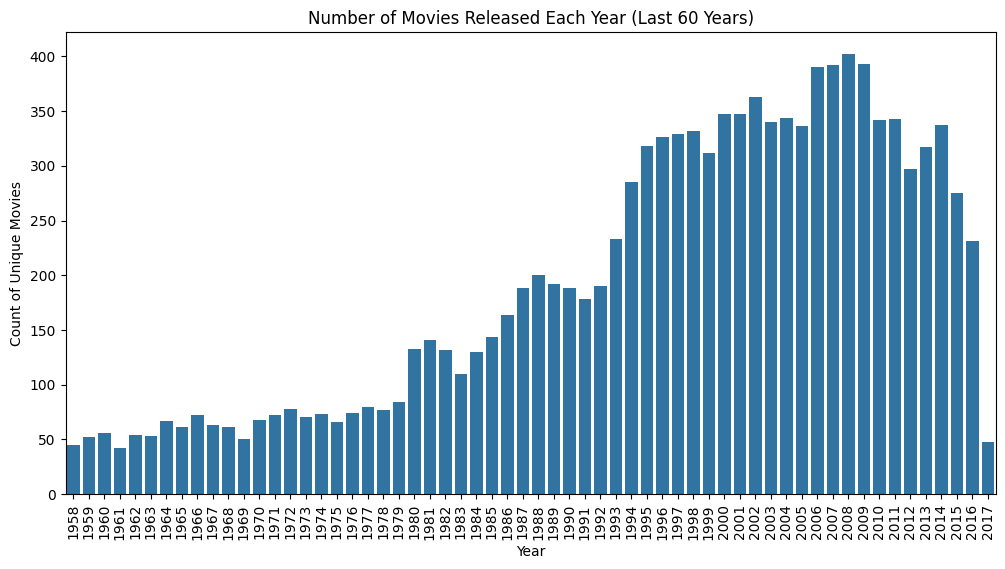

In [13]:
movies_per_year = final_data.groupby('year')['title'].nunique()

plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index[-60:], y=movies_per_year.values[-60:])  # last 60 years
plt.xticks(rotation=90)
plt.title("Number of Movies Released Each Year (Last 60 Years)")
plt.xlabel("Year")
plt.ylabel("Count of Unique Movies")
plt.show()
